In [11]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
import contractions
import re
import random
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
additional  = ['rt','rts','retweet'] # lista adicional de stopwords
swords = set().union(stopwords.words('english'),additional) # adicionando palavras para o stopwords

pd.options.display.float_format = '{:,.2f}'.format

In [12]:
# controla tamanho geral das figuras no matplotlib/seaborn
TAMANHO_GERAL = [15, 10]
plt.rcParams['figure.figsize'] = TAMANHO_GERAL
sns.set(rc={'figure.figsize' : TAMANHO_GERAL})

In [13]:
# https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets
p = 0.005

dataFrame = pd.read_csv('Data/Bitcoin_tweets_6_2_2021.csv', skiprows=lambda i: i>0 and random.random() > p, lineterminator='\n' )
# dataFrame['date'] = pd.to_datetime(dataFrame['date']).dt.date
# twFrame = pd.read_csv('Data/Bitcoin_tweets_6_2_2021.csv')
dataFrame

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Sam Knight,On the move,~ Expression of Soul ~ Not from 🌏👽,2010-01-11 02:54:33,"1,091.00",80.00,"2,183.00",False,2021-02-10 22:40:51,Can I bring #bitcoin on #SharkTank ? #BTC 😂,"['bitcoin', 'SharkTank', 'BTC']",Twitter for iPhone,False
1,Coinstats,Blockchain,Stats every hour of the top 10 crypto currencies,2016-04-30 15:47:58,"3,508.00",0.00,0.00,False,2021-02-10 21:00:09,"Bitcoin - BTC\nPrice: $44,661.86\nChange in 1h...","['Bitcoin', 'BTC']",CoinStats,False
2,Darren Jamaal Heard,"Chicago, IL",@southsideblock meetup group. Helping spread t...,2018-04-13 17:41:03,213.00,"1,356.00","16,074.00",False,2021-02-10 18:37:17,Blue Ridge Bank will allow customers to purcha...,"['Bitcoin', 'BTC']",Twitter for Android,False
3,jobair8351,NaN,NaN,2019-06-13 07:49:06,"2,443.00","4,913.00","1,855.00",False,2021-02-10 17:43:57,#SEVENPLUS #Bitenium #MedicalTextile #SPORTSWE...,"['SEVENPLUS', 'Bitenium', 'MedicalTextile', 'S...",Twitter Web App,False
4,Rakesh Jain,"Beawar, Rajasthan, India",#indiancryptolover\nCrypto Lover #BTC #Bitcoi...,2016-10-03 12:05:31,887.00,"1,985.00","5,187.00",False,2021-02-10 16:13:34,Twitter CFO Says Firm May Add Bitcoin to its B...,"['BTC', 'Bitcoin', 'IndiaWantsCrypto']",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,𝐁𝐮𝐭𝐭𝐞𝐫𝐜𝐮𝐩 ❁,NaN,TG: @cryptobabeee 我们都会成功的 \n\nETH-BSC-FTM \nI ...,2021-07-26 04:49:44,"24,509.00",210.00,"1,063.00",False,2021-10-20 00:33:37,This is a monster.... at 14m right now.... \n\...,"['luffy', 'shiba', 'SHIBARMY', 'PokemonUNITE',...",Twitter Web App,False
7471,Lazy Trade - A social trading experiment,metametaverseverse,An experiment to rank Crypto Twitter by follow...,2021-01-20 05:57:34,231.00,264.00,110.00,False,2021-10-20 00:15:04,Potential trade signal:\n\nIt's possible we ma...,"['Binance', 'BTC']",One Touch Trader - Lazy Trade,False
7472,Bitcoin_Whale_Alert,NaN,The most advanced #BTC bitcoin tracker and ana...,2021-10-02 12:31:40,97.00,0.00,4.00,False,2021-10-20 00:10:18,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 2f3d1b12a4e6...,"['BTC', 'btc_whale_alert', 'bitcoin']",Bitcoin Whale Alert,False
7473,DYOR.net,Internet,"https://t.co/Qykbgsea8v makes your Binance, Ku...",2018-01-03 13:46:13,"74,840.00",537.00,638.00,False,2021-10-19 22:47:56,[SCAN RESULTS - 15m - #BTC PAIR]\n\nExchange: ...,"['BTC', 'Binance']",DYORCryptoBot,False


In [14]:
indexes2Drop = dataFrame[dataFrame['date'].str.contains("bitcoin|Bitcoin|ETH|btc|BTC")].index
dataFrame.drop(indexes2Drop,inplace=True)

In [15]:
dataFrame['date'] = pd.to_datetime(dataFrame['date']).dt.date
# pd.to_datetime(dataFrame['date'])dt.date

In [16]:
twFrame = dataFrame[['date','text']]
twFrame

,date,text
0,2021-02-10,Can I bring #bitcoin on #SharkTank ? #BTC 😂
1,2021-02-10,"Bitcoin - BTC\nPrice: $44,661.86\nChange in 1h..."
2,2021-02-10,Blue Ridge Bank will allow customers to purcha...
3,2021-02-10,#SEVENPLUS #Bitenium #MedicalTextile #SPORTSWE...
4,2021-02-10,Twitter CFO Says Firm May Add Bitcoin to its B...
...,...,...
7470,2021-10-20,This is a monster.... at 14m right now.... \n\...
7471,2021-10-20,Potential trade signal:\n\nIt's possible we ma...
7472,2021-10-20,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 2f3d1b12a4e6...
7473,2021-10-19,[SCAN RESULTS - 15m - #BTC PAIR]\n\nExchange: ...


In [17]:
twText = twFrame[['text']]
twText

,text
0,Can I bring #bitcoin on #SharkTank ? #BTC 😂
1,"Bitcoin - BTC\nPrice: $44,661.86\nChange in 1h..."
2,Blue Ridge Bank will allow customers to purcha...
3,#SEVENPLUS #Bitenium #MedicalTextile #SPORTSWE...
4,Twitter CFO Says Firm May Add Bitcoin to its B...
...,...
7470,This is a monster.... at 14m right now.... \n\...
7471,Potential trade signal:\n\nIt's possible we ma...
7472,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 2f3d1b12a4e6...
7473,[SCAN RESULTS - 15m - #BTC PAIR]\n\nExchange: ...


In [18]:
twText['text'] = twText['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) # remove urls
twText['text'] = twText['text'].str.replace('\d+', '') # remove valores numericos
twText.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
text = twText['text'][0]
text

'Can I bring #bitcoin on #SharkTank ? #BTC 😂'

In [19]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub("@[A-Za-z0-9_]+","", text) #remove menções
    text = re.sub(r'#[a-zA-z0-9]+','',text) # remove hashtag
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)        
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^a-z0-9]"," ", text)
    text = contractions.fix(text)
    # text = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    # words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [20]:
twFrame['cleantext']=twText['text'].map(lambda x: tweet_to_words(x))
twFrame

,date,text,cleantext
0,2021-02-10,Can I bring #bitcoin on #SharkTank ? #BTC 😂,[bring]
1,2021-02-10,"Bitcoin - BTC\nPrice: $44,661.86\nChange in 1h...","[bitcoin, btc, price, change, h, market, cap, ..."
2,2021-02-10,Blue Ridge Bank will allow customers to purcha...,"[blue, ridge, bank, allow, customers, purchase..."
3,2021-02-10,#SEVENPLUS #Bitenium #MedicalTextile #SPORTSWE...,[]
4,2021-02-10,Twitter CFO Says Firm May Add Bitcoin to its B...,"[twitter, cfo, says, firm, may, add, bitcoin, ..."
...,...,...,...
7470,2021-10-20,This is a monster.... at 14m right now.... \n\...,"[monster, right, lmao, dudeeeeeeeee, monster, ..."
7471,2021-10-20,Potential trade signal:\n\nIt's possible we ma...,"[potential, trade, signal, possible, may, made..."
7472,2021-10-20,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 2f3d1b12a4e6...,"[bitcoin, whale, alert, tx, fdbaecdbfecfeabeda..."
7473,2021-10-19,[SCAN RESULTS - 15m - #BTC PAIR]\n\nExchange: ...,"[scan, results, pair, exchange, top, bullish, ..."


In [21]:
pd.DatetimeIndex(twFrame["date"]).date

array([datetime.date(2021, 2, 10), datetime.date(2021, 2, 10),
       datetime.date(2021, 2, 10), ..., datetime.date(2021, 10, 20),
       datetime.date(2021, 10, 19), datetime.date(2021, 10, 19)],
      dtype=object)

In [22]:
# import contractions
# text = '''She'd like to know how I'd done that! 
#           She's going to the park and I don't think I'll be home for dinner.
#           Theyre going to the zoo and she'll be home for dinner.'''
  
# text = contractions.fix(text)
# print(text)

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    return sentiment_dict['compound']
     
 
    # decide sentiment as positive, negative and neutral
#     if sentiment_dict['compound'] >= 0.05 :
#         return "Positive"
 
#     elif sentiment_dict['compound'] <= - 0.05 :
#          return  "Negative"
 
#     else :
#          return "Neutral"

In [24]:
%%time
sentimental = [sentiment_scores(i) for i in twFrame['cleantext']]

twFrame["Sentimento"] = sentimental
twFrame["Sentimento"]

CPU times: user 51 s, sys: 971 ms, total: 52 s
Wall time: 52 s


0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
7470   0.00
7471   0.00
7472   0.00
7473   0.00
7474   0.00
Name: Sentimento, Length: 7475, dtype: float64

In [25]:
twFrame["Sentimento"].describe()

count   7,475.00
mean        0.00
std         0.04
min        -0.57
25%         0.00
50%         0.00
75%         0.00
max         0.64
Name: Sentimento, dtype: float64

<AxesSubplot:xlabel='date'>

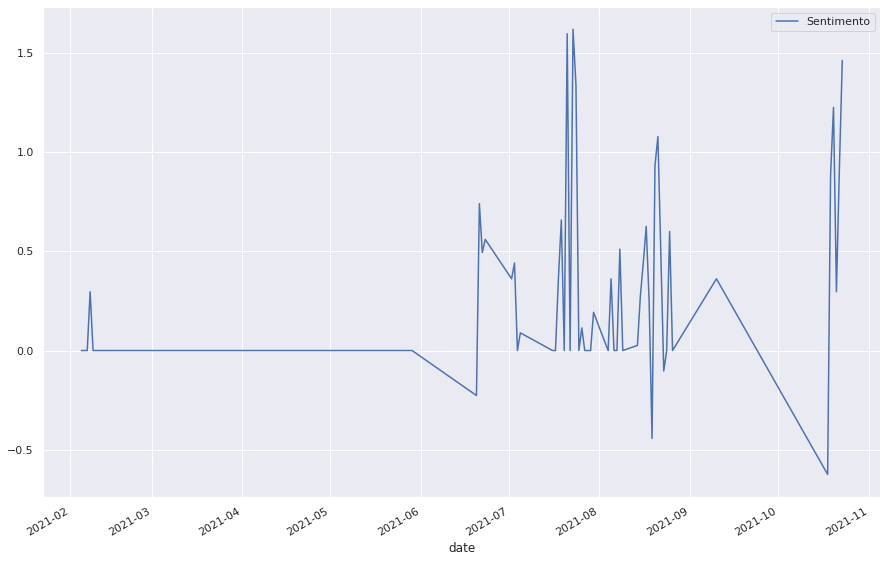

In [26]:
pd.DatetimeIndex(twFrame['date']).normalize()
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum().sort_values()
twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum().plot(legend=True)


In [27]:
# twFrame[(twFrame["Sentimento"].sort_values() > 0.2) | (twFrame["Sentimento"].sort_values() < -0.2) ]
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum()
g = twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize()).sum()
g.reset_index(inplace = True)
g

,date,Sentimento
0,2021-02-05,0.00
1,2021-02-06,0.00
2,2021-02-07,0.00
3,2021-02-08,0.30
4,2021-02-09,0.00
...,...,...
79,2021-10-19,0.88
80,2021-10-20,1.22
81,2021-10-21,0.30
82,2021-10-22,0.91


In [28]:

minmaxpoints = g[ (g['Sentimento'] >= 0.2) | (g['Sentimento'] <= -0.2) ]
minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minmaxpoints

,date,Sentimento
3,2021-02-08,0.30
36,2021-06-20,-0.23
37,2021-06-21,0.74
38,2021-06-22,0.49
39,2021-06-23,0.56
40,2021-07-02,0.36
41,2021-07-03,0.44
46,2021-07-18,0.36
47,2021-07-19,0.66
49,2021-07-21,1.59


In [29]:
minmaxpoints['date'] = minmaxpoints['date'].astype(str)
aa = list(minmaxpoints['date'])
aa

['2021-02-08',
 '2021-06-20',
 '2021-06-21',
 '2021-06-22',
 '2021-06-23',
 '2021-07-02',
 '2021-07-03',
 '2021-07-18',
 '2021-07-19',
 '2021-07-21',
 '2021-07-23',
 '2021-07-24',
 '2021-08-05',
 '2021-08-08',
 '2021-08-15',
 '2021-08-16',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-21',
 '2021-08-25',
 '2021-09-10',
 '2021-10-18',
 '2021-10-19',
 '2021-10-20',
 '2021-10-21',
 '2021-10-22',
 '2021-10-23']

In [30]:
btcPrice = pd.read_csv('Data/BTC-USD_otc272020_oct272021.csv')
# btcPrice[btcPrice['Date'] == '2021-02-08']
btcPrice

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-28,"13,654.21","13,837.70","12,932.25","13,271.29","13,271.29",35867318895
1,2020-10-29,"13,271.30","13,612.05","12,980.06","13,437.88","13,437.88",56499499598
2,2020-10-30,"13,437.87","13,651.52","13,136.20","13,546.52","13,546.52",30581485201
3,2020-10-31,"13,546.53","14,028.21","13,457.53","13,781.00","13,781.00",30306464719
4,2020-11-01,"13,781.00","13,862.03","13,628.38","13,737.11","13,737.11",24453857900
...,...,...,...,...,...,...,...
361,2021-10-24,"61,368.34","61,505.80","59,643.34","60,930.84","60,930.84",27316183882
362,2021-10-25,"60,893.93","63,729.32","60,691.80","63,039.82","63,039.82",31064911614
363,2021-10-26,"63,032.76","63,229.03","59,991.16","60,363.79","60,363.79",34878965587
364,2021-10-27,"60,352.00","61,435.18","58,208.19","58,482.39","58,482.39",43657076893


In [31]:
# btcPrice.loc[btcPrice['Date'] == teste]
# btcPrice[btcPrice['Date'] == teste]
    

In [32]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
zz = btcPrice.query('Date in @aa')
zz
btcPrice.loc[zz.index,'teste'] = True
btcPrice['teste'] = btcPrice['teste'].replace(np.nan,False)
btcPrice['Date']

0      2020-10-28
1      2020-10-29
2      2020-10-30
3      2020-10-31
4      2020-11-01
          ...    
361    2021-10-24
362    2021-10-25
363    2021-10-26
364    2021-10-27
365    2021-10-28
Name: Date, Length: 366, dtype: object

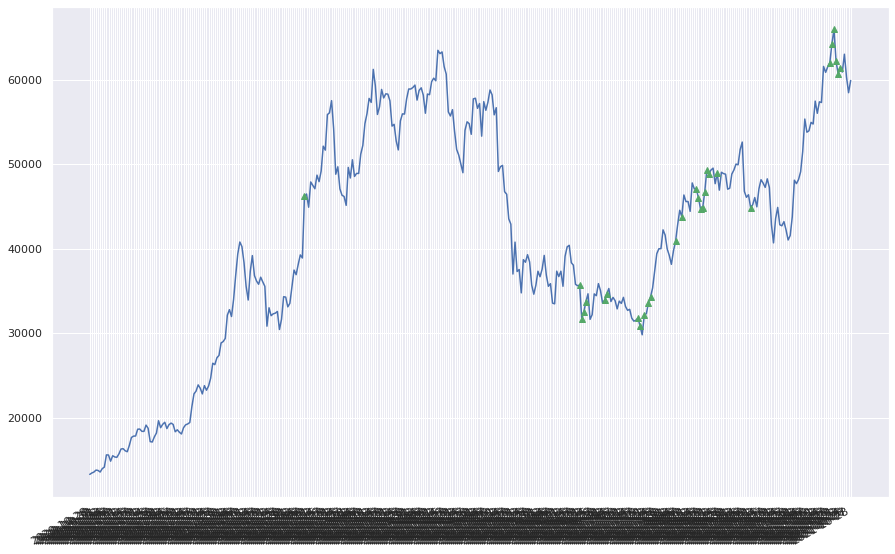

In [33]:
# btcPrice.plot(x='Date', y=['Close','teste'])


# fig, ax1 = plt.subplots()
# ax1.plot(btcPrice['Date'],btcPrice['Close'])
# ax1.plot(btcPrice['Date'],btcPrice['teste'],marker='o')

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['teste']]

fig, ax1 = plt.subplots()
ax1.plot(btcPrice['Date'], ts)       
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()